# Supervised Regression
### Lineaer Regression, Pricing a Home

Boise State University\
Department of Computer Science\
CS 334 Algorithms of Machine Learning\
Conrad Kennington\
Fall 2022

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [99]:
data = pd.read_csv("housing_data.csv")

In [100]:
# number of rows/samples
len(data.index)

21613

# Data Exploration

In [101]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


/opt/homebrew/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


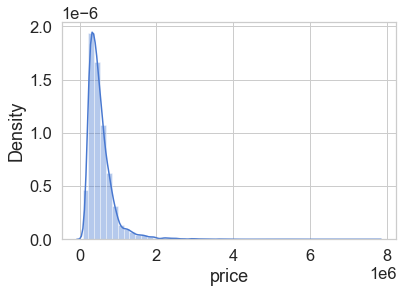

In [102]:
sns.distplot(data['price']);

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

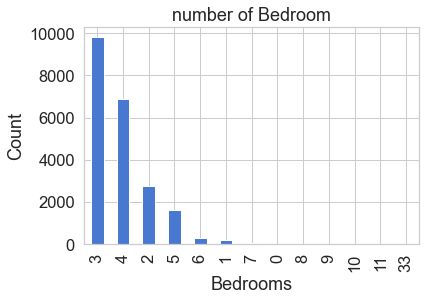

In [103]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

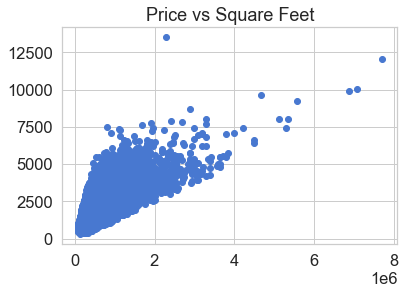

In [104]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location of the area')

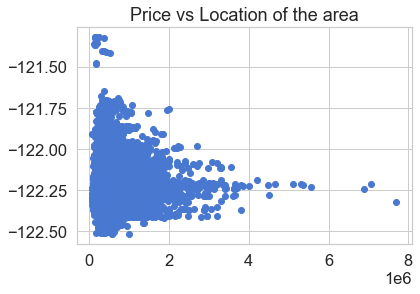

In [105]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'Latitude vs Price')

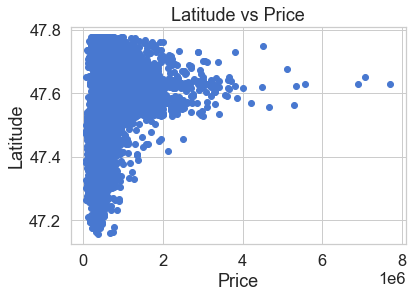

In [106]:
plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

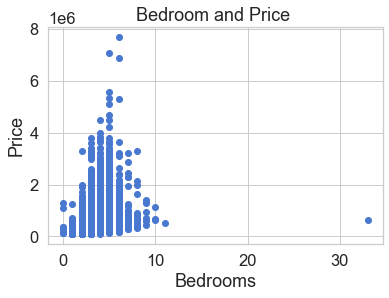

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [107]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

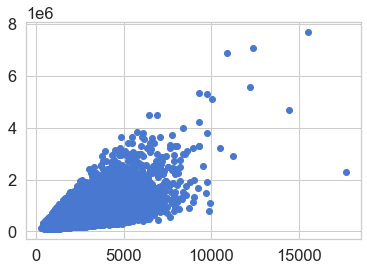

In [108]:
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])

# Isolate the labels into their own dataframe

In [109]:
labels = data['price']

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

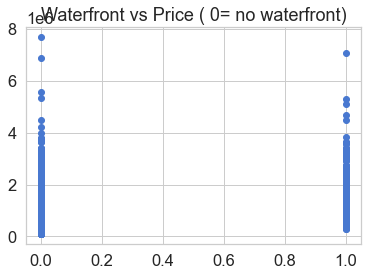

In [110]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

# Drop the label from training set

In [111]:
train = data.drop(['price'],axis=1)

# Drop other labels that probably don't predict prices

In [112]:
train = train.drop(['id', 'date'],axis=1)

In [113]:
train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Linear Regression

In [114]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Train/test split

In [115]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(train , labels , test_size = 0.10,random_state =2)

In [116]:
reg.fit(x_train,y_train)

LinearRegression()

# Accuracy

In [117]:
reg.score(x_test,y_test)

0.732034276035739

# Try it in a new house / sample

In [118]:
df = pd.DataFrame(columns=["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"])
sample = [[1680, 8080, 1.0, 0, 0, 3, 8, 1680, 0, 1987, 0, 98074, 47.43234, -122.045, 1800, 7503]]

In [119]:
new_sample = {
    "bedrooms": 4,
    "bathrooms": 3,
    "sqft_living": 1680,
    "sqft_lot": 8080,
    "floors": 1,
    "waterfront": 0,
    "view" : 0,
    "condition": 3,
    "grade": 8,
    "sqft_above": 1680,
    "sqft_basement": 0,
    "yr_built": 1987,
    "yr_renovated": 0,
    "zipcode": 98074,
    "lat": 47.43234,
    "long": -122.045,
    "sqft_living15": 1800,
    "sqft_lot15": 7503
}

In [120]:
predicted_price = reg.predict(pd.DataFrame([new_sample]))

In [123]:
predicted_price

array([332147.84677277])